# Exploratory data analysis:

### Importing required packages:

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style='whitegrid')
from scipy import stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler

### Loading data into Dataframe:

In [5]:
df = pd.read_csv('scaler_clustering.csv')
df

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0
...,...,...,...,...,...,...,...
205838,206918,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,NaN,2019.0
205839,206919,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,NaN,2020.0
205840,206920,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,NaN,2021.0
205841,206921,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,NaN,2019.0


__Summary__:

- We have 205843 data points, and 7 features. We can drop the column `Unnamed: 0` as it's the row Sr. No.
- Also, our objective is clustering, the `email_hash` won't be useful feature as we won't be looking at the granularity of the data, but more focused on groping the data into similar clusters. Hence droping email ids will be useful

In [6]:
# Creating a copy of original dataframe

df_org = df.copy()

### Identification of variables and data types:

In [7]:
df.shape

(205843, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153279 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


In [9]:
def feature_names(df):

    print(f"Columns with category datatypes (Categorical Features) are : \
    {list(df.select_dtypes('object').columns)}")
    print('-'*125)
    print('-'*125)
    print(f"Columns with integer and float datatypes (Numerical Features) are: \
    {list(df.select_dtypes(['int64','float64']).columns)}")

In [10]:
feature_names(df)

Columns with category datatypes (Categorical Features) are :     ['company_hash', 'email_hash', 'job_position']
-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Columns with integer and float datatypes (Numerical Features) are:     ['Unnamed: 0', 'orgyear', 'ctc', 'ctc_updated_year']


### Analysing the basic metrics:

In [11]:
df.describe(include=[np.number]).transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,205843.0,1.032739e+05,5.974131e+04,0.0,51518.5,103151.0,154992.5,2.069220e+05
orgyear,205757.0,2.014883e+03,6.357112e+01,0.0,2013.0,2016.0,2018.0,2.016500e+04
ctc,205843.0,2.271685e+06,1.180091e+07,2.0,530000.0,950000.0,1700000.0,1.000150e+09
ctc_updated_year,205843.0,2.019628e+03,1.325104e+00,2015.0,2019.0,2020.0,2021.0,2.021000e+03


In [12]:
df.describe(include = [object]).transpose()

,count,unique,top,freq
company_hash,205799,37299,nvnv wgzohrnvzwj otqcxwto,8337
email_hash,205843,153443,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,10
job_position,153279,1016,Backend Engineer,43554


### Missing values:

In [13]:
# Missing values:

def missingValue(df):
    #Identifying Missing data.
    total_null = df.isnull().sum().sort_values(ascending = False)
    percent = ((df.isnull().sum()/len(df))*100).sort_values(ascending = False)
    print(f"Total records in our data =  {df.shape[0]} where missing values are as follows:")

    missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
    return missing_data

In [14]:
missing_df = missingValue(df)
missing_df[missing_df['Total Missing'] > 0]

Total records in our data =  205843 where missing values are as follows:


,Total Missing,In Percent
job_position,52564,25.54
orgyear,86,0.04
company_hash,44,0.02


- Total 3 features has missing values (job, year, company)

# Data Preprocessing

In [15]:
# We can drop the column `Unnamed: 0` as it's the row Sr. No.
# Also, our objective is clustering, the `email_hash` won't be useful feature
#as we won't be looking at the granularity of the data, but more focused on groping the data into similar clusters.
# Hence droping email ids will be useful

df.drop(columns = ['Unnamed: 0','email_hash'], inplace = True, axis = 1)

In [16]:
# Using a regex function for removing special characters

import re
def remove_special (string):
    new_string=re.sub('[^A-Za-z ]+', '', string)
    return new_string


In [17]:
#what happens here
mystring='\tAirtel\\\\&&**() X Labs'
re.sub('[^A-Za-z ]+', '', mystring)

'Airtel X Labs'

In [18]:
# Data Cleaning on job_position

df.job_position=df.job_position.apply(lambda x: remove_special(str(x)))
df.job_position=df.job_position.apply(lambda x: x.lower())
df.job_position=df.job_position.apply(lambda x: x.strip())
df.job_position

0                      other
1         fullstack engineer
2           backend engineer
3           backend engineer
4         fullstack engineer
                 ...        
205838                   nan
205839                   nan
205840                   nan
205841                   nan
205842                   nan
Name: job_position, Length: 205843, dtype: object

In [19]:
df.shape

(205843, 5)

In [20]:
df.drop_duplicates(inplace=True)
df.shape

(188246, 5)

In [21]:
df['company_hash'].value_counts().sort_index()


company_hash
0                                 2
0000                              1
01 ojztqsj                        2
05mz exzytvrny uqxcvnt rxbxnta    2
1                                 2
                                 ..
zyvzwt wgzohrnxzs tzsxzttqo       1
zz                                2
zzb ztdnstz vacxogqj ucn rna      2
zzgato                            1
zzzbzb                            1
Name: count, Length: 37299, dtype: int64

In [22]:
# Data Cleaning on company_hash

df.company_hash=df.company_hash.apply(lambda x: remove_special(str(x)))
df.company_hash=df.company_hash.apply(lambda x: x.lower())
df.company_hash=df.company_hash.apply(lambda x: x.strip())
df.company_hash

0                    atrgxnnt xzaxv
1         qtrxvzwt xzegwgbb rxbxnta
2                     ojzwnvwnxw vx
3                         ngpgutaxv
4                        qxen sqghu
                    ...            
205838                    vuurt xzw
205839                    husqvawgb
205840                     vwwgrxnt
205841               zgn vuurxwvmrt
205842               bgqsvz onvzrtj
Name: company_hash, Length: 188246, dtype: object

In [23]:
df['company_hash'].value_counts().sort_index()

company_hash
                                                85
a                                                1
a b onttr wgqu                                   1
a j uvnxr owyggr ge tzsxzttqxzs vwvatbj vbmx     1
a ntwy ogrhnxgzo ucn rna                         2
                                                ..
zz                                               2
zz wgzztwn mya                                   1
zzb ztdnstz vacxogqj ucn rna                     2
zzgato                                           1
zzzbzb                                           1
Name: count, Length: 37208, dtype: int64

In [24]:
print(df.shape)
print(df.drop_duplicates().shape)
df.drop_duplicates(inplace=True)


(188246, 5)
(188245, 5)


In [25]:
#removing rows where company or job_position is not available

df=df[ ~((df['company_hash']=='') | (df['job_position']==''))]


In [26]:
df.shape

(188152, 5)

In [27]:
df['orgyear'].isnull().sum()

86

In [28]:
company_median_org_year=df.groupby('company_hash')['orgyear'].median()
company_median_org_year

company_hash
a                                               2017.0
a b onttr wgqu                                  2019.0
a j uvnxr owyggr ge tzsxzttqxzs vwvatbj vbmx    2015.0
a ntwy ogrhnxgzo ucn rna                        2013.0
a ntwyzgrgsxto                                  2015.0
                                                 ...  
zz                                              2011.0
zz wgzztwn mya                                  2009.0
zzb ztdnstz vacxogqj ucn rna                    2017.0
zzgato                                          2014.0
zzzbzb                                          1990.0
Name: orgyear, Length: 37205, dtype: float64

In [29]:
#Code to impute
def null_imputation(table_from_which_we_need_to_fill, main_col, null_col):
    if np.isnan(null_col):
        return table_from_which_we_need_to_fill[main_col]
    else:
        return null_col


In [30]:
# Filling Null values using Median Target Imputation for Orgyear

df['orgyear']=df.apply(lambda x: null_imputation(company_median_org_year,x['company_hash'],x['orgyear'] ), axis=1)
df['orgyear']

0         2016.0
1         2018.0
2         2015.0
3         2017.0
4         2017.0
           ...  
205838    2008.0
205839    2017.0
205840    2021.0
205841    2019.0
205842    2014.0
Name: orgyear, Length: 188152, dtype: float64

In [31]:
#if we still have null values, we'll drop it

len(df[df['orgyear'].isnull()])

26

In [32]:
#dropping remaining null values
df=df[~df['orgyear'].isnull()]

In [33]:
missing_df = missingValue(df)
missing_df[missing_df['Total Missing'] > 0]

Total records in our data =  188126 where missing values are as follows:


,Total Missing,In Percent


# Outlier Detection and Treatment
- `orgyear`
- `ctc`

In [34]:
#simple understanding
df.orgyear.value_counts().sort_values(ascending=True)


orgyear
200.0         1
2011.5        1
1900.0        1
208.0         1
2204.0        1
          ...  
2019.0    18550
2015.0    19613
2017.0    21320
2016.0    21477
2018.0    22157
Name: count, Length: 79, dtype: int64

In [35]:
#simple understanding
df.ctc.value_counts().sort_values(ascending=True)

ctc
1916000       1
2664000       1
28200         1
983000        1
516000        1
           ... 
1200000    5623
500000     5661
800000     5917
1000000    6835
600000     6857
Name: count, Length: 3360, dtype: int64

In [36]:
#removing outliers from orgyear using IQR

q1=df.orgyear.quantile(0.25)
q3=df.orgyear.quantile(0.75)
iqr=q3-q1
df=df.loc[(df.orgyear>=q1-1.5*iqr) & (df.orgyear<=q3+1.5*iqr)]

#removing outliers from ctc using IQR

q1=df.ctc.quantile(0.25)
q3=df.ctc.quantile(0.75)
iqr=q3-q1
df=df.loc[(df.ctc>=q1-1.5*iqr) & (df.ctc<=q3+1.5*iqr)]

In [37]:
df.orgyear.value_counts().sort_index(ascending=True)


orgyear
2006.0     1635
2007.0     1821
2008.0     2279
2009.0     3215
2010.0     5004
2011.0     7023
2011.5        1
2012.0     9366
2013.0    11134
2014.0    15090
2014.5        2
2015.0    18535
2016.0    20394
2017.0    20421
2018.0    21335
2019.0    17909
2020.0     9940
2021.0     2900
2022.0      739
2023.0      200
2024.0       32
2025.0       11
Name: count, dtype: int64

In [38]:
print(df.shape)
print(df.drop_duplicates().shape)
df.drop_duplicates(inplace=True)


(168986, 5)
(168985, 5)


In [39]:
df

,company_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0
2,ojzwnvwnxw vx,2015.0,2000000,backend engineer,2020.0
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0
...,...,...,...,...,...
205836,mvqwrvjo,2011.0,2250000,nan,2019.0
205838,vuurt xzw,2008.0,220000,nan,2019.0
205839,husqvawgb,2017.0,500000,nan,2020.0
205840,vwwgrxnt,2021.0,700000,nan,2021.0


In [40]:
#We see some 'nan's in job_position
df.loc[df['job_position']=='nan','job_position']=np.nan

In [41]:
df

,company_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0
2,ojzwnvwnxw vx,2015.0,2000000,backend engineer,2020.0
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0
...,...,...,...,...,...
205836,mvqwrvjo,2011.0,2250000,NaN,2019.0
205838,vuurt xzw,2008.0,220000,NaN,2019.0
205839,husqvawgb,2017.0,500000,NaN,2020.0
205840,vwwgrxnt,2021.0,700000,NaN,2021.0


In [42]:
feature_names(df)

Columns with category datatypes (Categorical Features) are :     ['company_hash', 'job_position']
-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Columns with integer and float datatypes (Numerical Features) are:     ['orgyear', 'ctc', 'ctc_updated_year']


In [43]:
def numerical_feat(df,colname,nrows=2,mcols=2,width=15,height=15):
    fig , ax = plt.subplots(nrows,mcols,figsize=(width,height))
    fig.set_facecolor("lightgrey")
    rows = 0
    for var in colname:
        ax[rows][0].set_title("Boxplot for Outlier Detection ", fontweight="bold")
        plt.ylabel(var, fontsize=12)
        sns.boxplot(y = df[var],color='crimson',ax=ax[rows][0])

        # plt.subplot(nrows,mcols,pltcounter+1)
        sns.distplot(df[var],color='purple',ax=ax[rows][1])
        ax[rows][1].axvline(df[var].mean(), color='r', linestyle='--', label="Mean")
        ax[rows][1].axvline(df[var].median(), color='m', linestyle='-', label="Median")
        ax[rows][1].axvline(df[var].mode()[0], color='royalblue', linestyle='-', label="Mode")
        ax[rows][1].set_title("Outlier Detection ", fontweight="bold")
        ax[rows][1].legend({'Mean':df[var].mean(),'Median':df[var].median(),'Mode':df[var].mode()})
        rows += 1
    plt.show()

In [44]:
# We won't consider 'ctc_updated_year' as numerical but istead categorical features

numerical_cols = ['ctc', 'orgyear']

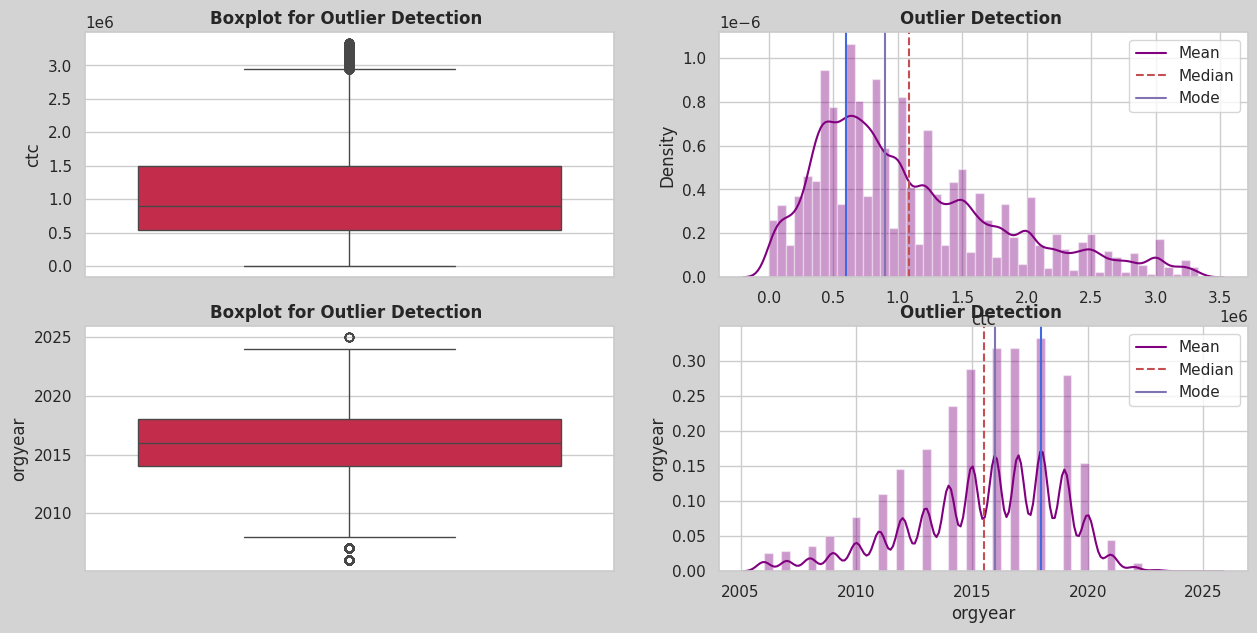

In [45]:
numerical_feat(df,numerical_cols,len(numerical_cols),2,15,7)

In [46]:
categorical_cols = ['company_hash', 'job_position', 'ctc_updated_year']

In [47]:
for i in categorical_cols:
    print(f" Unique values in {i} are {df[i].nunique()}")

 Unique values in company_hash are 34008
 Unique values in job_position are 761
 Unique values in ctc_updated_year are 7


In [48]:
# categorical_cols = ['ctc_updated_year']

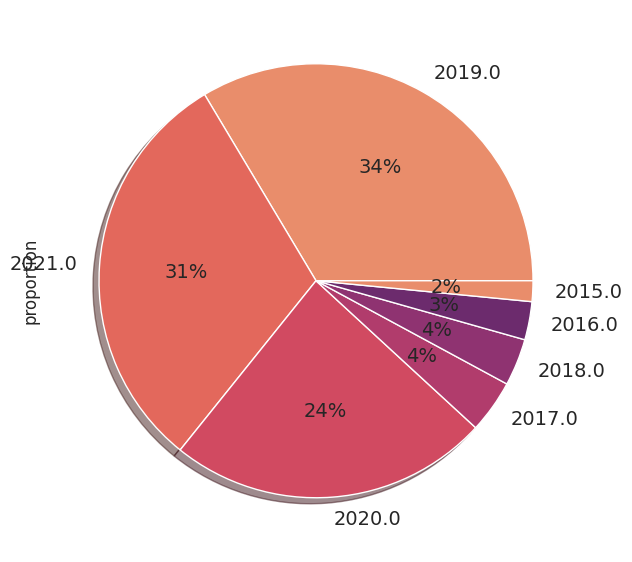

In [49]:
plt.figure(figsize = (7,8))
count = (df['ctc_updated_year'].value_counts(normalize=True)*100)
count.plot.pie(colors = sns.color_palette("flare"),autopct='%0.0f%%',
                       textprops={'fontsize': 14},shadow = True)
plt.show()

# Feature Engineering:
### Definition:
- 1. Designation: Salary an employee is getting wrt salary in the same Company, Job_Position & Years of
Experience
- 2. Class: Salary an employee is getting wrt the salary in the same Company & Job_Position
- 3. Tier: Salary an employee is getting wrt the salary in the same Company


In [50]:
# ![image.png](attachment:image.png)
df.company_hash.value_counts()


company_hash
nvnv wgzohrnvzwj otqcxwto              4111
xzegojo                                2910
vbvkgz                                 2226
wgszxkvzn                              2115
vwwtznhqt                              1998
                                       ... 
wrjbxz ogenrvmo                           1
vsxrtmgn vhngbvnxgz uqxcvnt rxbxnta       1
whbhrho ztnfgqp                           1
utznvhq ntwy                              1
zxzlv cvz                                 1
Name: count, Length: 34008, dtype: int64

- #### Masking companies by renaming it to "Others" having count less than 5

In [51]:
df.company_hash.value_counts() <= 5

company_hash
nvnv wgzohrnvzwj otqcxwto              False
xzegojo                                False
vbvkgz                                 False
wgszxkvzn                              False
vwwtznhqt                              False
                                       ...  
wrjbxz ogenrvmo                         True
vsxrtmgn vhngbvnxgz uqxcvnt rxbxnta     True
whbhrho ztnfgqp                         True
utznvhq ntwy                            True
zxzlv cvz                               True
Name: count, Length: 34008, dtype: bool

In [52]:
df.company_hash.map(df.company_hash.value_counts()) <= 5

0         False
1         False
2          True
3         False
4         False
          ...  
205836    False
205838    False
205839    False
205840    False
205842    False
Name: company_hash, Length: 168985, dtype: bool

In [53]:
df[df.company_hash.map(df.company_hash.value_counts())<=5]

,company_hash,orgyear,ctc,job_position,ctc_updated_year
2,ojzwnvwnxw vx,2015.0,2000000,backend engineer,2020.0
9,xrbhd,2019.0,360000,NaN,2019.0
11,ngdor ntwy,2016.0,600000,ios engineer,2021.0
16,pnw xzaxv ucn rna,2013.0,800000,other,2020.0
21,axgz srgmvr,2006.0,1550000,engineering leadership,2019.0
...,...,...,...,...,...
205811,mrht onvnt axsxnvr,2013.0,85000,NaN,2016.0
205815,bvptbjnqxu td vbvkgz,2015.0,2400000,NaN,2019.0
205816,wgat ergf ntwy rru,2019.0,2200000,NaN,2020.0
205817,wxowg ojntbo,2011.0,3327000,NaN,2019.0


In [54]:
df['new']=df.company_hash.mask(df.company_hash.map(df.company_hash.value_counts())<=5)
df['new']

0                    atrgxnnt xzaxv
1         qtrxvzwt xzegwgbb rxbxnta
2                               NaN
3                         ngpgutaxv
4                        qxen sqghu
                    ...            
205836                     mvqwrvjo
205838                    vuurt xzw
205839                    husqvawgb
205840                     vwwgrxnt
205842               bgqsvz onvzrtj
Name: new, Length: 168985, dtype: object

In [55]:
df

,company_hash,orgyear,ctc,job_position,ctc_updated_year,new
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,atrgxnnt xzaxv
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,qtrxvzwt xzegwgbb rxbxnta
2,ojzwnvwnxw vx,2015.0,2000000,backend engineer,2020.0,NaN
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,ngpgutaxv
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,qxen sqghu
...,...,...,...,...,...,...
205836,mvqwrvjo,2011.0,2250000,NaN,2019.0,mvqwrvjo
205838,vuurt xzw,2008.0,220000,NaN,2019.0,vuurt xzw
205839,husqvawgb,2017.0,500000,NaN,2020.0,husqvawgb
205840,vwwgrxnt,2021.0,700000,NaN,2021.0,vwwgrxnt


In [56]:
df[df['new']=='Others'].company_hash.value_counts()


Series([], Name: count, dtype: int64)

In [57]:
df=df.apply(lambda x: x.mask(x.map(x.value_counts())<=5,'Others') if x.name=='company_hash' else x)
df

,company_hash,orgyear,ctc,job_position,ctc_updated_year,new
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,atrgxnnt xzaxv
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,qtrxvzwt xzegwgbb rxbxnta
2,Others,2015.0,2000000,backend engineer,2020.0,NaN
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,ngpgutaxv
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,qxen sqghu
...,...,...,...,...,...,...
205836,mvqwrvjo,2011.0,2250000,NaN,2019.0,mvqwrvjo
205838,vuurt xzw,2008.0,220000,NaN,2019.0,vuurt xzw
205839,husqvawgb,2017.0,500000,NaN,2020.0,husqvawgb
205840,vwwgrxnt,2021.0,700000,NaN,2021.0,vwwgrxnt


In [58]:
df.company_hash.value_counts()

company_hash
Others                                    46749
nvnv wgzohrnvzwj otqcxwto                  4111
xzegojo                                    2910
vbvkgz                                     2226
wgszxkvzn                                  2115
                                          ...  
ihvrwgbb xzw                                  6
lxgovvcz                                      6
vrsgfgqpo ntwyzgrgsxto                        6
wvbuhotvx                                     6
xzntr ntwyzgrgsj xzaxv uqxcvnt rxbxnta        6
Name: count, Length: 2943, dtype: int64

In [59]:
df.drop(columns='new',inplace=True)

- #### Creating Years of Experience Columns


In [60]:
df.drop_duplicates(inplace=True)
df.shape


(147139, 5)

In [61]:
#orgyear check
df['orgyear'] = df.apply(lambda x: x['orgyear'] if x['orgyear'] <= 2022 else 2022, axis=1)

In [62]:
df['years_of_experience']=2022-df['orgyear']


In [63]:
df.drop_duplicates(inplace=True)
df.shape

(147100, 6)

In [64]:
df=df[~df['years_of_experience'].isnull()]


In [65]:
#ctc_updated_year_check
df['ctc_updated_year'] = df.apply(lambda x: x['orgyear'] if x['ctc_updated_year'] < x['orgyear'] else x['ctc_updated_year'], axis=1)
df

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,6.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,4.0
2,Others,2015.0,2000000,backend engineer,2020.0,7.0
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,5.0
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,5.0
...,...,...,...,...,...,...
205836,mvqwrvjo,2011.0,2250000,NaN,2019.0,11.0
205838,vuurt xzw,2008.0,220000,NaN,2019.0,14.0
205839,husqvawgb,2017.0,500000,NaN,2020.0,5.0
205840,vwwgrxnt,2021.0,700000,NaN,2021.0,1.0


In [66]:
#Filling null values with others -- if not done before
df['job_position'] = df['job_position'].fillna('Others')
df['company_hash'] = df['company_hash'].fillna('Others')


In [67]:
missingValue(df)

Total records in our data =  147100 where missing values are as follows:


,Total Missing,In Percent
company_hash,0,0.0
orgyear,0,0.0
ctc,0,0.0
job_position,0,0.0
ctc_updated_year,0,0.0
years_of_experience,0,0.0


In [68]:
df.drop_duplicates(inplace=True)
df.shape


(146052, 6)

In [69]:
df.describe()


,orgyear,ctc,ctc_updated_year,years_of_experience
count,146052.000000,1.460520e+05,146052.000000,146052.000000
mean,2015.449384,1.129332e+06,2019.598444,6.550616
std,3.300262,7.439639e+05,1.339107,3.300262
min,2006.000000,2.000000e+00,2015.000000,0.000000
25%,2013.000000,5.700000e+05,2019.000000,4.000000
50%,2016.000000,9.600000e+05,2020.000000,6.000000
75%,2018.000000,1.560000e+06,2021.000000,9.000000
max,2022.000000,3.330000e+06,2022.000000,16.000000


### Manual Clustering based on company, job position and years of experience

In [70]:
grouped_c_j_y=df.groupby(['years_of_experience','job_position','company_hash'])['ctc'].describe()

In [71]:
grouped_c_j_y

count  \
years_of_experience job_position     company_hash                           
0.0                 Others           Others                          42.0   
                                     agzn fgqp xz vzj gqsvzxkvnxgz    1.0   
                                     atrgxnnt                         1.0   
                                     atrr                             1.0   
                                     atrr ntwyzgrgsxto                2.0   
...                                                                   ...   
16.0                support engineer xzegojo                          1.0   
                                     xzegq                            1.0   
                                     ywr ntwyzgrgsxto                 2.0   
                                     zvz                              1.0   
                    team lead        utqoxontzn ojontbo               1.0   

                                                                            mean  \
years_of_experience job_position     company_hash                                  
0.0                 Others           Others                         7.058619e+05   
                                     agzn fgqp xz vzj gqsvzxkvnxgz  1.600000e+06   
                                     atrgxnnt                       1.000000e+06   
                                     atrr                           1.000000e+06   
                                     atrr ntwyzgrgsxto              1.000000e+06   
...                                                                          ...   
16.0                support engineer xzegojo                        8.000000e+05   
                                     xzegq                          9.000000e+05   
                                     ywr ntwyzgrgsxto               8.500000e+05   
                                     zvz                            4.000000e+05   
                    team lead        utqoxontzn ojontbo             1.600000e+06   

                                                                              std  \
years_of_experience job_position     company_hash                                   
0.0                 Others           Others                         674812.642666   
                                     agzn fgqp xz vzj gqsvzxkvnxgz            NaN   
                                     atrgxnnt                                 NaN   
                                     atrr                                     NaN   
                                     atrr ntwyzgrgsxto              282842.712475   
...                                                                           ...   
16.0                support engineer xzegojo                                  NaN   
                                     xzegq                                    NaN   
                                     ywr ntwyzgrgsxto               494974.746831   
                                     zvz                                      NaN   
                    team lead        utqoxontzn ojontbo                       NaN   

                                                                          min  \
years_of_experience job_position     company_hash                               
0.0                 Others           Others                             200.0   
                                     agzn fgqp xz vzj gqsvzxkvnxgz  1600000.0   
                                     atrgxnnt                       1000000.0   
                                     atrr                           1000000.0   
                                     atrr ntwyzgrgsxto               800000.0   
...                                                                       ...   
16.0                support engineer xzegojo                         800000.0   
                                     xzegq                           900000.0   
                                     ywr ntwyzgrgsxto    

In [72]:
df_cjy=df.merge(grouped_c_j_y, on=['years_of_experience','job_position','company_hash'], how = 'left')
df_cjy

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,count,mean,std,min,25%,50%,75%,max
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,6.0,1.0,1.100000e+06,NaN,1100000.0,1100000.0,1100000.0,1100000.0,1100000.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,4.0,7.0,7.742856e+05,250922.324350,449999.0,610000.0,750000.0,900000.0,1200000.0
2,Others,2015.0,2000000,backend engineer,2020.0,7.0,456.0,9.609559e+05,776546.830662,1000.0,307500.0,800000.0,1435000.0,3200000.0
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,5.0,7.0,1.158571e+06,404780.951933,700000.0,825000.0,1200000.0,1405000.0,1750000.0
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,5.0,1.0,1.400000e+06,NaN,1400000.0,1400000.0,1400000.0,1400000.0,1400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146047,mvqwrvjo,2011.0,2250000,Others,2019.0,11.0,11.0,1.427273e+06,468638.192678,530000.0,1250000.0,1350000.0,1634999.5,2250000.0
146048,vuurt xzw,2008.0,220000,Others,2019.0,14.0,1.0,2.200000e+05,NaN,220000.0,220000.0,220000.0,220000.0,220000.0
146049,husqvawgb,2017.0,500000,Others,2020.0,5.0,4.0,1.202500e+06,471902.179129,500000.0,1145000.0,1405000.0,1462500.0,1500000.0
146050,vwwgrxnt,2021.0,700000,Others,2021.0,1.0,3.0,6.666667e+05,351188.458428,300000.0,500000.0,700000.0,850000.0,1000000.0


In [73]:
df_cjy.sort_values(['years_of_experience','job_position','company_hash'])


,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,count,mean,std,min,25%,50%,75%,max
896,Others,2022.0,120000,Others,2022.0,0.0,42.0,7.058619e+05,674812.642666,200.0,227500.0,490000.0,1014999.25,3000000.0
2599,Others,2022.0,430000,Others,2022.0,0.0,42.0,7.058619e+05,674812.642666,200.0,227500.0,490000.0,1014999.25,3000000.0
7691,Others,2022.0,570000,Others,2022.0,0.0,42.0,7.058619e+05,674812.642666,200.0,227500.0,490000.0,1014999.25,3000000.0
7870,Others,2022.0,550000,Others,2022.0,0.0,42.0,7.058619e+05,674812.642666,200.0,227500.0,490000.0,1014999.25,3000000.0
8789,Others,2022.0,680000,Others,2022.0,0.0,42.0,7.058619e+05,674812.642666,200.0,227500.0,490000.0,1014999.25,3000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73608,xzegq,2006.0,900000,support engineer,2021.0,16.0,1.0,9.000000e+05,NaN,900000.0,900000.0,900000.0,900000.00,900000.0
11355,ywr ntwyzgrgsxto,2006.0,500000,support engineer,2021.0,16.0,2.0,8.500000e+05,494974.746831,500000.0,675000.0,850000.0,1025000.00,1200000.0
37161,ywr ntwyzgrgsxto,2006.0,1200000,support engineer,2021.0,16.0,2.0,8.500000e+05,494974.746831,500000.0,675000.0,850000.0,1025000.00,1200000.0
14265,zvz,2006.0,400000,support engineer,2021.0,16.0,1.0,4.000000e+05,NaN,400000.0,400000.0,400000.0,400000.00,400000.0


In [74]:
df_cjy.drop_duplicates(inplace=True)
df_cjy.shape
#no change till now

(146052, 14)

- #### Creating Designation basis on the salary they are getting in their respective company


In [75]:
def condition_designation(a,b_50,b_75):
    if a<b_50:
        return 3
    elif a>=b_50 and a<=b_75:
        return 2
    elif a>=b_75:
        return 1

In [76]:
df.head()


,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,6.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,4.0
2,Others,2015.0,2000000,backend engineer,2020.0,7.0
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,5.0
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,5.0


In [77]:
df_cjy['designation'] =df_cjy.apply(lambda x: condition_designation(x['ctc'],x['50%'],x['75%']),axis = 1)

In [78]:
df_cjy.head()

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,count,mean,std,min,25%,50%,75%,max,designation
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,6.0,1.0,1.100000e+06,NaN,1100000.0,1100000.0,1100000.0,1100000.0,1100000.0,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,4.0,7.0,7.742856e+05,250922.324350,449999.0,610000.0,750000.0,900000.0,1200000.0,3
2,Others,2015.0,2000000,backend engineer,2020.0,7.0,456.0,9.609559e+05,776546.830662,1000.0,307500.0,800000.0,1435000.0,3200000.0,1
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,5.0,7.0,1.158571e+06,404780.951933,700000.0,825000.0,1200000.0,1405000.0,1750000.0,3
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,5.0,1.0,1.400000e+06,NaN,1400000.0,1400000.0,1400000.0,1400000.0,1400000.0,2


In [79]:
df_cjy.shape

(146052, 15)

In [80]:
df_cjy.designation.value_counts(normalize=True)*100

designation
2    44.118533
3    34.180977
1    21.700490
Name: proportion, dtype: float64

### Manual Clustering based on company and job position

In [81]:
grouped_c_j=df.groupby(['job_position','company_hash'])['ctc'].describe()


In [82]:
grouped_c_j

count  \
job_position          company_hash                                       
Others                Others                                    3159.0   
                      a ntwyzgrgsxto                               5.0   
                      aaqxctz avnv owxtzwto  vzvrjnxwo ucn rna     1.0   
                      adw ntwyzgrgsj                              59.0   
                      adw ntwyzgrgsxto                            37.0   
...                                                                ...   
wordpress developer   Others                                       1.0   
worker                zgn vuurxwvmrt vwwghzn                       1.0   
x                     Others                                       1.0   
young professional ii sgctqzbtzn ge xzaxv                          1.0   
zomato                kgbvng                                       1.0   

                                                                        mean  \
job_position          company_hash                                             
Others                Others                                    1.025099e+06   
                      a ntwyzgrgsxto                            6.750000e+05   
                      aaqxctz avnv owxtzwto  vzvrjnxwo ucn rna  5.000000e+05   
                      adw ntwyzgrgsj                            6.451864e+05   
                      adw ntwyzgrgsxto                          6.230000e+05   
...                                                                      ...   
wordpress developer   Others                                    6.000000e+05   
worker                zgn vuurxwvmrt vwwghzn                    2.000000e+05   
x                     Others                                    4.000000e+05   
young professional ii sgctqzbtzn ge xzaxv                       5.000000e+05   
zomato                kgbvng                                    5.000000e+05   

                                                                          std  \
job_position          company_hash                                              
Others                Others                                    837191.520717   
                      a ntwyzgrgsxto                            389711.431703   
                      aaqxctz avnv owxtzwto  vzvrjnxwo ucn rna            NaN   
                      adw ntwyzgrgsj                            449039.606370   
                      adw ntwyzgrgsxto                          323412.705035   
...                                                                       ...   
wordpress developer   Others                                              NaN   
worker                zgn vuurxwvmrt vwwghzn                              NaN   
x                     Others                                              NaN   
young professional ii sgctqzbtzn ge xzaxv                                 NaN   
zomato                kgbvng                                              NaN   

                                                                     min  \
job_position          company_hash                                         
Others                Others                                        15.0   
                      a ntwyzgrgsxto                            350000.0   
                      aaqxctz avnv owxtzwto  vzvrjnxwo ucn rna  500000.0   
                      adw ntwyzgrgsj                             80000.0   
                      adw ntwyzgrgsxto                          100000.0   
...                                                                  ...   
wordpress developer   Others                                    600000.0   
worker                zgn vuurxwvmrt vwwghzn                    200000.0   
x                     Others                                    400000.0   
young professional ii sgctqzbtzn ge xzaxv                       500000.0   
zomato                kgbvng                                    500000.0   

                  

In [83]:
df.drop_duplicates().shape


(146052, 6)

In [84]:
df_cj=df.merge(grouped_c_j, on=['job_position','company_hash'], how='left')
df_cj

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,count,mean,std,min,25%,50%,75%,max
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,6.0,2.0,1.085000e+06,2.121320e+04,1070000.0,1077500.0,1085000.0,1092500.0,1100000.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,4.0,25.0,9.882000e+05,4.874998e+05,300000.0,600000.0,850000.0,1380000.0,2000000.0
2,Others,2015.0,2000000,backend engineer,2020.0,7.0,3871.0,1.001007e+06,8.124658e+05,1000.0,300000.0,830000.0,1530000.0,3300000.0
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,5.0,24.0,1.416667e+06,5.453413e+05,520000.0,1047500.0,1375000.0,1792500.0,2600000.0
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,5.0,3.0,8.466667e+05,4.801389e+05,540000.0,570000.0,600000.0,1000000.0,1400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146047,mvqwrvjo,2011.0,2250000,Others,2019.0,11.0,64.0,1.259969e+06,5.777488e+05,500000.0,800000.0,1020000.0,1607500.0,3200000.0
146048,vuurt xzw,2008.0,220000,Others,2019.0,14.0,16.0,1.568312e+06,1.231984e+06,60000.0,216250.0,2275000.0,2550000.0,3000000.0
146049,husqvawgb,2017.0,500000,Others,2020.0,5.0,13.0,1.000769e+06,3.300369e+05,500000.0,750000.0,1000000.0,1200000.0,1500000.0
146050,vwwgrxnt,2021.0,700000,Others,2021.0,1.0,35.0,1.200371e+06,5.635221e+05,300000.0,771500.0,1100000.0,1400000.0,2700000.0


In [85]:
df_cj.sort_values(['company_hash','job_position','years_of_experience'])

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,count,mean,std,min,25%,50%,75%,max
896,Others,2022.0,120000,Others,2022.0,0.0,3159.0,1.025099e+06,837191.520717,15.0,358500.0,800000.0,1525000.0,3327000.0
2599,Others,2022.0,430000,Others,2022.0,0.0,3159.0,1.025099e+06,837191.520717,15.0,358500.0,800000.0,1525000.0,3327000.0
7691,Others,2022.0,570000,Others,2022.0,0.0,3159.0,1.025099e+06,837191.520717,15.0,358500.0,800000.0,1525000.0,3327000.0
7870,Others,2022.0,550000,Others,2022.0,0.0,3159.0,1.025099e+06,837191.520717,15.0,358500.0,800000.0,1525000.0,3327000.0
8789,Others,2022.0,680000,Others,2022.0,0.0,3159.0,1.025099e+06,837191.520717,15.0,358500.0,800000.0,1525000.0,3327000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122134,zxztrtvuo,2013.0,1200000,ios engineer,2017.0,9.0,1.0,1.200000e+06,NaN,1200000.0,1200000.0,1200000.0,1200000.0,1200000.0
53733,zxztrtvuo,2016.0,1200000,member of technical staff at nineleaps,2020.0,6.0,1.0,1.200000e+06,NaN,1200000.0,1200000.0,1200000.0,1200000.0,1200000.0
9189,zxztrtvuo,2020.0,450000,other,2020.0,2.0,2.0,4.500000e+05,0.000000,450000.0,450000.0,450000.0,450000.0,450000.0
133203,zxztrtvuo,2019.0,450000,other,2020.0,3.0,2.0,4.500000e+05,0.000000,450000.0,450000.0,450000.0,450000.0,450000.0


In [86]:
df_cj.shape


(146052, 14)

In [87]:
df_cj.drop_duplicates(inplace=True)


In [88]:
df_cj.shape

(146052, 14)

- #### Creating Class basis on the salary they are getting in their respective company


In [89]:
def condition_classs(a,b_50,b_75):
    if a<b_50:
        return 3
    elif a>=b_50 and a<=b_75:
        return 2

    elif a>=b_75:
        return 1


In [90]:
df_cj['classs'] =df_cj.apply(lambda x: condition_classs(x['ctc'],x['50%'],x['75%']),axis = 1)
df_cj

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,count,mean,std,min,25%,50%,75%,max,classs
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,6.0,2.0,1.085000e+06,2.121320e+04,1070000.0,1077500.0,1085000.0,1092500.0,1100000.0,1
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,4.0,25.0,9.882000e+05,4.874998e+05,300000.0,600000.0,850000.0,1380000.0,2000000.0,3
2,Others,2015.0,2000000,backend engineer,2020.0,7.0,3871.0,1.001007e+06,8.124658e+05,1000.0,300000.0,830000.0,1530000.0,3300000.0,1
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,5.0,24.0,1.416667e+06,5.453413e+05,520000.0,1047500.0,1375000.0,1792500.0,2600000.0,3
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,5.0,3.0,8.466667e+05,4.801389e+05,540000.0,570000.0,600000.0,1000000.0,1400000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146047,mvqwrvjo,2011.0,2250000,Others,2019.0,11.0,64.0,1.259969e+06,5.777488e+05,500000.0,800000.0,1020000.0,1607500.0,3200000.0,1
146048,vuurt xzw,2008.0,220000,Others,2019.0,14.0,16.0,1.568312e+06,1.231984e+06,60000.0,216250.0,2275000.0,2550000.0,3000000.0,3
146049,husqvawgb,2017.0,500000,Others,2020.0,5.0,13.0,1.000769e+06,3.300369e+05,500000.0,750000.0,1000000.0,1200000.0,1500000.0,3
146050,vwwgrxnt,2021.0,700000,Others,2021.0,1.0,35.0,1.200371e+06,5.635221e+05,300000.0,771500.0,1100000.0,1400000.0,2700000.0,3


In [91]:
df_cj.classs.value_counts(normalize=True)*100

classs
3    43.736477
2    31.831129
1    24.432394
Name: proportion, dtype: float64

In [92]:
# job position that has the highest class
df_cj[df_cj['classs']==1][['job_position','ctc']].groupby('job_position')['ctc'].describe()

,count,mean,std,min,25%,50%,75%,max
job_position,,,,,,,,
Others,8217.0,1.931143e+06,695531.136886,100000.0,1400000.0,1900000.0,2500000.0,3330000.0
android engineer,913.0,1.784897e+06,638704.770985,14000.0,1320000.0,1700000.0,2200000.0,3300000.0
application developer,1.0,1.150000e+06,NaN,1150000.0,1150000.0,1150000.0,1150000.0,1150000.0
application developer analyst,1.0,6.000000e+05,NaN,600000.0,600000.0,600000.0,600000.0,600000.0
application development analyst,2.0,8.150000e+05,233345.237792,650000.0,732500.0,815000.0,897500.0,980000.0
...,...,...,...,...,...,...,...,...
support engineer,683.0,1.190779e+06,552019.578789,350000.0,830000.0,1000000.0,1400000.0,3310000.0
system engineer,10.0,8.420000e+05,373118.986086,400000.0,550000.0,775000.0,1100000.0,1500000.0
teaching assistant,1.0,1.800000e+06,NaN,1800000.0,1800000.0,1800000.0,1800000.0,1800000.0


In [93]:
df_cjy.head()


,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,count,mean,std,min,25%,50%,75%,max,designation
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,6.0,1.0,1.100000e+06,NaN,1100000.0,1100000.0,1100000.0,1100000.0,1100000.0,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,4.0,7.0,7.742856e+05,250922.324350,449999.0,610000.0,750000.0,900000.0,1200000.0,3
2,Others,2015.0,2000000,backend engineer,2020.0,7.0,456.0,9.609559e+05,776546.830662,1000.0,307500.0,800000.0,1435000.0,3200000.0,1
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,5.0,7.0,1.158571e+06,404780.951933,700000.0,825000.0,1200000.0,1405000.0,1750000.0,3
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,5.0,1.0,1.400000e+06,NaN,1400000.0,1400000.0,1400000.0,1400000.0,1400000.0,2


In [94]:
df_cj.head()

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,count,mean,std,min,25%,50%,75%,max,classs
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,6.0,2.0,1.085000e+06,21213.203436,1070000.0,1077500.0,1085000.0,1092500.0,1100000.0,1
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,4.0,25.0,9.882000e+05,487499.789590,300000.0,600000.0,850000.0,1380000.0,2000000.0,3
2,Others,2015.0,2000000,backend engineer,2020.0,7.0,3871.0,1.001007e+06,812465.827695,1000.0,300000.0,830000.0,1530000.0,3300000.0,1
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,5.0,24.0,1.416667e+06,545341.270627,520000.0,1047500.0,1375000.0,1792500.0,2600000.0,3
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,5.0,3.0,8.466667e+05,480138.868801,540000.0,570000.0,600000.0,1000000.0,1400000.0,1


In [95]:
df_cj.shape

(146052, 15)

In [96]:
df_cjy.shape

(146052, 15)

In [97]:
df_cj.drop(columns=['count','mean','std','min','25%','50%','75%','max'],inplace=True)
df_cjy.drop(columns=['count','mean','std','min','25%','50%','75%','max'],inplace=True)

In [98]:
df_cj.drop_duplicates().shape

(146052, 7)

In [99]:
df_cjy.drop_duplicates().shape

(146052, 7)

In [100]:
df_cjy

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,designation
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,6.0,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,4.0,3
2,Others,2015.0,2000000,backend engineer,2020.0,7.0,1
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,5.0,3
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,5.0,2
...,...,...,...,...,...,...,...
146047,mvqwrvjo,2011.0,2250000,Others,2019.0,11.0,1
146048,vuurt xzw,2008.0,220000,Others,2019.0,14.0,2
146049,husqvawgb,2017.0,500000,Others,2020.0,5.0,3
146050,vwwgrxnt,2021.0,700000,Others,2021.0,1.0,2


In [101]:
df_cj

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,classs
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,6.0,1
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,4.0,3
2,Others,2015.0,2000000,backend engineer,2020.0,7.0,1
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,5.0,3
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,5.0,1
...,...,...,...,...,...,...,...
146047,mvqwrvjo,2011.0,2250000,Others,2019.0,11.0,1
146048,vuurt xzw,2008.0,220000,Others,2019.0,14.0,3
146049,husqvawgb,2017.0,500000,Others,2020.0,5.0,3
146050,vwwgrxnt,2021.0,700000,Others,2021.0,1.0,3


In [102]:
df_cjy_cj=df_cj.merge(df_cjy, on=['company_hash','orgyear','ctc','job_position','years_of_experience','ctc_updated_year'], how = 'right')
df_cjy_cj

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,classs,designation
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,6.0,1,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,4.0,3,3
2,Others,2015.0,2000000,backend engineer,2020.0,7.0,1,1
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,5.0,3,3
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,5.0,1,2
...,...,...,...,...,...,...,...,...
146047,mvqwrvjo,2011.0,2250000,Others,2019.0,11.0,1,1
146048,vuurt xzw,2008.0,220000,Others,2019.0,14.0,3,2
146049,husqvawgb,2017.0,500000,Others,2020.0,5.0,3,3
146050,vwwgrxnt,2021.0,700000,Others,2021.0,1.0,3,2


In [103]:
df_cjy_cj.shape

(146052, 8)

In [104]:
df_cjy_cj.drop_duplicates().shape

(146052, 8)

### Manual Clustering based on company

In [105]:
grouped_c=df.groupby(['company_hash'])['ctc'].describe()


In [106]:
df_c=df.merge(grouped_c, on=['company_hash'], how='left')

In [107]:
df_c.head(5)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,count,mean,std,min,25%,50%,75%,max
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,6.0,9.0,1.115667e+06,458111.885897,500000.0,800000.0,1070000.0,1500000.0,1771000.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,4.0,384.0,1.055291e+06,636095.670307,10000.0,600000.0,850000.0,1500000.0,3200000.0
2,Others,2015.0,2000000,backend engineer,2020.0,7.0,24489.0,9.675951e+05,761666.853194,15.0,390000.0,800000.0,1400000.0,3329999.0
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,5.0,59.0,1.455508e+06,655423.458086,200000.0,1075000.0,1300000.0,1850000.0,3160000.0
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,5.0,6.0,9.400000e+05,389871.773792,540000.0,625000.0,850000.0,1300000.0,1400000.0


In [108]:
#verify
df_c.sort_values(['company_hash'])

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,count,mean,std,min,25%,50%,75%,max
73025,Others,2017.0,65000,Others,2019.0,5.0,24489.0,967595.092940,761666.853194,15.0,390000.0,800000.0,1400000.0,3329999.0
66471,Others,2017.0,1210000,backend engineer,2019.0,5.0,24489.0,967595.092940,761666.853194,15.0,390000.0,800000.0,1400000.0,3329999.0
66479,Others,2015.0,220000,qa engineer,2019.0,7.0,24489.0,967595.092940,761666.853194,15.0,390000.0,800000.0,1400000.0,3329999.0
66480,Others,2018.0,650000,qa engineer,2019.0,4.0,24489.0,967595.092940,761666.853194,15.0,390000.0,800000.0,1400000.0,3329999.0
66482,Others,2017.0,1140000,fullstack engineer,2019.0,5.0,24489.0,967595.092940,761666.853194,15.0,390000.0,800000.0,1400000.0,3329999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68659,zxztrtvuo,2019.0,1000000,backend engineer,2021.0,3.0,68.0,964676.455882,565370.795931,400000.0,515000.0,784999.5,1200000.0,2700000.0
115889,zxztrtvuo,2017.0,1000000,backend engineer,2019.0,5.0,68.0,964676.455882,565370.795931,400000.0,515000.0,784999.5,1200000.0,2700000.0
23629,zxztrtvuo,2018.0,1360000,backend engineer,2020.0,4.0,68.0,964676.455882,565370.795931,400000.0,515000.0,784999.5,1200000.0,2700000.0
82842,zxztrtvuo,2018.0,710000,fullstack engineer,2020.0,4.0,68.0,964676.455882,565370.795931,400000.0,515000.0,784999.5,1200000.0,2700000.0


In [109]:
print(df.drop_duplicates().shape)
print(df_c.shape)
print(df_c.drop_duplicates().shape)


(146052, 6)
(146052, 14)
(146052, 14)


- #### Creating Tier basis on the salary in the companies

In [110]:
def condition_tier(a,b_50,b_75):
    if a<b_50:
        return 3
    elif a>=b_50 and a<=b_75:
        return 2
    elif a>=b_75:
        return 1


In [111]:
df_c['tier'] =df_c.apply(lambda x: condition_tier(x['ctc'],x['50%'],x['75%']),axis = 1)
df_c

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,count,mean,std,min,25%,50%,75%,max,tier
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,6.0,9.0,1.115667e+06,4.581119e+05,500000.0,800000.0,1070000.0,1500000.0,1771000.0,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,4.0,384.0,1.055291e+06,6.360957e+05,10000.0,600000.0,850000.0,1500000.0,3200000.0,3
2,Others,2015.0,2000000,backend engineer,2020.0,7.0,24489.0,9.675951e+05,7.616669e+05,15.0,390000.0,800000.0,1400000.0,3329999.0,1
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,5.0,59.0,1.455508e+06,6.554235e+05,200000.0,1075000.0,1300000.0,1850000.0,3160000.0,3
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,5.0,6.0,9.400000e+05,3.898718e+05,540000.0,625000.0,850000.0,1300000.0,1400000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146047,mvqwrvjo,2011.0,2250000,Others,2019.0,11.0,65.0,1.264431e+06,5.743451e+05,500000.0,800000.0,1040000.0,1600000.0,3200000.0,1
146048,vuurt xzw,2008.0,220000,Others,2019.0,14.0,16.0,1.568312e+06,1.231984e+06,60000.0,216250.0,2275000.0,2550000.0,3000000.0,3
146049,husqvawgb,2017.0,500000,Others,2020.0,5.0,97.0,1.275361e+06,5.880548e+05,200000.0,850000.0,1150000.0,1600000.0,3200000.0,3
146050,vwwgrxnt,2021.0,700000,Others,2021.0,1.0,157.0,1.344255e+06,5.743742e+05,200000.0,1000000.0,1300000.0,1500000.0,3000000.0,3


In [112]:
df_c.head()


,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,count,mean,std,min,25%,50%,75%,max,tier
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,6.0,9.0,1.115667e+06,458111.885897,500000.0,800000.0,1070000.0,1500000.0,1771000.0,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,4.0,384.0,1.055291e+06,636095.670307,10000.0,600000.0,850000.0,1500000.0,3200000.0,3
2,Others,2015.0,2000000,backend engineer,2020.0,7.0,24489.0,9.675951e+05,761666.853194,15.0,390000.0,800000.0,1400000.0,3329999.0,1
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,5.0,59.0,1.455508e+06,655423.458086,200000.0,1075000.0,1300000.0,1850000.0,3160000.0,3
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,5.0,6.0,9.400000e+05,389871.773792,540000.0,625000.0,850000.0,1300000.0,1400000.0,1


In [113]:
df_c.tier.value_counts(normalize=True)*100

tier
3    47.952099
2    28.153671
1    23.894229
Name: proportion, dtype: float64

In [114]:
df_cjy_cj_c=df_cjy_cj.merge(df_c, on=['company_hash','orgyear','ctc','job_position'\
                                      ,'ctc_updated_year','years_of_experience'], how = 'left')

In [115]:
df_cjy_cj_c.head(10)


,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,classs,designation,count,mean,std,min,25%,50%,75%,max,tier
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,6.0,1,2,9.0,1.115667e+06,458111.885897,500000.0,800000.0,1070000.0,1500000.0,1771000.0,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,4.0,3,3,384.0,1.055291e+06,636095.670307,10000.0,600000.0,850000.0,1500000.0,3200000.0,3
2,Others,2015.0,2000000,backend engineer,2020.0,7.0,1,1,24489.0,9.675951e+05,761666.853194,15.0,390000.0,800000.0,1400000.0,3329999.0,1
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,5.0,3,3,59.0,1.455508e+06,655423.458086,200000.0,1075000.0,1300000.0,1850000.0,3160000.0,3
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,5.0,1,2,6.0,9.400000e+05,389871.773792,540000.0,625000.0,850000.0,1300000.0,1400000.0,1
5,yvuuxrj hzbvqqxta bvqptnxzs ucn rna,2018.0,700000,fullstack engineer,2020.0,4.0,2,2,6.0,9.066667e+05,539728.326722,620000.0,640000.0,700000.0,775000.0,2000000.0,2
6,lubgqsvz wyvot wg,2018.0,1500000,fullstack engineer,2019.0,4.0,3,3,859.0,1.706719e+06,676070.394042,11000.0,1300000.0,1675000.0,2110000.0,3300000.0,3
7,vwwtznhqt ntwyzgrgsj,2019.0,400000,backend engineer,2019.0,3.0,3,3,24.0,6.633333e+05,265782.956019,300000.0,422500.0,620000.0,892500.0,1150000.0,3
8,utqoxontzn ojontbo,2020.0,450000,Others,2020.0,2.0,3,3,413.0,9.778668e+05,555184.830508,90000.0,550000.0,840000.0,1300000.0,3000000.0,3
9,Others,2019.0,360000,Others,2019.0,3.0,3,3,24489.0,9.675951e+05,761666.853194,15.0,390000.0,800000.0,1400000.0,3329999.0,3


In [116]:
df_cjy_cj_c.shape

(146052, 17)

In [117]:
data=df_cjy_cj_c.copy(deep=True)


In [118]:
data.drop(columns=['count','mean','std','min','25%','50%','75%','max'],inplace=True)

In [119]:
data

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,classs,designation,tier
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,6.0,1,2,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,4.0,3,3,3
2,Others,2015.0,2000000,backend engineer,2020.0,7.0,1,1,1
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,5.0,3,3,3
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,5.0,1,2,1
...,...,...,...,...,...,...,...,...,...
146047,mvqwrvjo,2011.0,2250000,Others,2019.0,11.0,1,1,1
146048,vuurt xzw,2008.0,220000,Others,2019.0,14.0,3,2,3
146049,husqvawgb,2017.0,500000,Others,2020.0,5.0,3,3,3
146050,vwwgrxnt,2021.0,700000,Others,2021.0,1.0,3,2,3


In [120]:
# org_data = pd.read_csv('data/scaler_clustering.csv')
# org_data

In [121]:
# df_new=data.merge(org_data, on=['company_hash'], how = 'left')
# df_new

In [122]:
pd.set_option('display.max_rows', 20)

In [123]:
# Top 10 companies providing highest ctc's

data.groupby(['company_hash'])['ctc'].max().head(11).sort_values(ascending = False)

company_hash
Others                                      3329999
adw ntwyzgrgsj                              3200000
a ntwyzgrgsxto                              3150000
agnut                                       3000000
agdutq                                      2500000
aghmnzhn                                    2400000
adw ntwyzgrgsxto                            2350000
agotrtwn                                    1610000
agnoihvqto                                  1600000
aaqxctz avnv owxtzwto  vzvrjnxwo ucn rna    1400000
aggartmrht xzzgcvnxgzo                      1000000
Name: ctc, dtype: int64

### Overview of what's next :
- Data processing for Unsupervised clustering - Label encoding/ One- hot encoding, Standardization of data
- Unsupervised Learning - Clustering
- Checking clustering tendency
- Elbow method
- K-means clustering
- Hierarchical clustering (you can do this on a sample of the dataset if your process is taking time)
- Insights from Unsupervised Clustering
- Provide actionable Insights & Recommendations for the Business.

- K-Means is a distance-based algorithm. Because of that, it’s really important to perform feature scaling (normalize, standardize, or choose any other option in which the distance has some comparable meaning for all the columns).

- In this example, we use MinMaxScaler instead of StandardScaler, so as to transforming the feature values to fall within the bounded intervals (min and max), rather than making them to fall around mean as 0 with standard deviation as 1 (StandardScaler).

- MinMaxScaler is an excellent tool for this purpose. MinMaxScaler scales all the data features in the range [0, 1] or else in the range [-1, 1] if there are negative values in the dataset. This scaling compresses all the inliers in the narrow range [0, 0.005].

In [124]:
data.shape

(146052, 9)

In [125]:
data['company_hash'].unique()

array(['atrgxnnt xzaxv', 'qtrxvzwt xzegwgbb rxbxnta', 'Others', ...,
       'srgxej', 'bh oxsbv', 'ohbngnvr ojontbo'], dtype=object)

In [126]:
# Label Encoding

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['company_hash']= label_encoder.fit_transform(data['company_hash'])
data['company_hash'].unique()

array([  45, 1497,    0, ..., 1667,  138, 1155])

In [127]:
data['job_position']= label_encoder.fit_transform(data['job_position'])
len(data['job_position'].unique())

762

In [128]:
data

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,classs,designation,tier
0,45,2016.0,1100000,377,2020.0,6.0,1,2,2
1,1497,2018.0,449999,235,2019.0,4.0,3,3,3
2,0,2015.0,2000000,105,2020.0,7.0,1,1,1
3,936,2017.0,700000,105,2019.0,5.0,3,3,3
4,1535,2017.0,1400000,235,2019.0,5.0,1,2,1
...,...,...,...,...,...,...,...,...,...
146047,884,2011.0,2250000,0,2019.0,11.0,1,1,1
146048,2158,2008.0,220000,0,2019.0,14.0,3,2,3
146049,636,2017.0,500000,0,2020.0,5.0,3,3,3
146050,2186,2021.0,700000,0,2021.0,1.0,3,2,3


In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146052 entries, 0 to 146051
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   company_hash         146052 non-null  int64  
 1   orgyear              146052 non-null  float64
 2   ctc                  146052 non-null  int64  
 3   job_position         146052 non-null  int64  
 4   ctc_updated_year     146052 non-null  float64
 5   years_of_experience  146052 non-null  float64
 6   classs               146052 non-null  int64  
 7   designation          146052 non-null  int64  
 8   tier                 146052 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 10.0 MB


In [130]:
# dropping org year and cts_updated year as we already have years of experience

data.drop(columns=['orgyear'],inplace=True)
data.drop(columns=['ctc_updated_year'],inplace=True)

In [131]:
missingValue(data)

Total records in our data =  146052 where missing values are as follows:


,Total Missing,In Percent
company_hash,0,0.0
ctc,0,0.0
job_position,0,0.0
years_of_experience,0,0.0
classs,0,0.0
designation,0,0.0
tier,0,0.0


In [132]:
data.head()

,company_hash,ctc,job_position,years_of_experience,classs,designation,tier
0,45,1100000,377,6.0,1,2,2
1,1497,449999,235,4.0,3,3,3
2,0,2000000,105,7.0,1,1,1
3,936,700000,105,5.0,3,3,3
4,1535,1400000,235,5.0,1,2,1


In [133]:
# Creating second copy after org_df

data_1 = data.copy()

In [134]:
from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# scaler.fit(data)
# data=scaler.transform(data)

ms = MinMaxScaler()

data[['ctc']] = ms.fit_transform(data[['ctc']])
data.head()

,company_hash,ctc,job_position,years_of_experience,classs,designation,tier
0,45,0.330330,377,6.0,1,2,2
1,1497,0.135134,235,4.0,3,3,3
2,0,0.600600,105,7.0,1,1,1
3,936,0.210210,105,5.0,3,3,3
4,1535,0.420420,235,5.0,1,2,1


# Clustering using Sklearn's implementation of Kmeans

In [135]:
# from sklearn.cluster import KMeans

# k = 3 ## arbitrary value
# kmeans = KMeans(n_clusters=k)
# y_pred = kmeans.fit_predict(data)

In [136]:
# ## what are learned labels(cluster #)
# y_pred

In [137]:
# ##coordinates of the cluster centers
# kmeans.cluster_centers_

In [138]:
X = data_1.copy()
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

In [139]:
from sklearn.cluster import KMeans

k = 3 ## arbitrary value
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [140]:
##coordinates of the cluster centers
kmeans.cluster_centers_

array([[0.42106296, 0.58222686, 0.22694486, 0.4983092 , 0.07946338,
        0.22831217, 0.05954212],
       [0.41462362, 0.18998503, 0.23264329, 0.35999868, 0.98794806,
        0.86553632, 0.9793948 ],
       [0.45047391, 0.32970016, 0.2572445 , 0.39964184, 0.52520207,
        0.4544456 , 0.62352332]])

In [141]:
y_pred is kmeans.labels_

True

# Visualizing Sklearn Clusters

In [142]:
X

array([[0.01529572, 0.33032993, 0.49540079, ..., 0.        , 0.5       ,
        0.5       ],
       [0.50883753, 0.13513432, 0.3088042 , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.60060036, 0.13797635, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.21617947, 0.15014964, 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.74303195, 0.21020974, 0.        , ..., 1.        , 0.5       ,
        1.        ],
       [0.04316791, 0.372372  , 0.        , ..., 1.        , 1.        ,
        1.        ]])

In [143]:
clusters = pd.DataFrame(X, columns=data_1.columns)
clusters['label'] = kmeans.labels_
clusters

,company_hash,ctc,job_position,years_of_experience,classs,designation,tier,label
0,0.015296,0.330330,0.495401,0.3750,0.0,0.5,0.5,2
1,0.508838,0.135134,0.308804,0.2500,1.0,1.0,1.0,1
2,0.000000,0.600600,0.137976,0.4375,0.0,0.0,0.0,0
3,0.318151,0.210210,0.137976,0.3125,1.0,1.0,1.0,1
4,0.521754,0.420420,0.308804,0.3125,0.0,0.5,0.0,0
...,...,...,...,...,...,...,...,...
146047,0.300476,0.675675,0.000000,0.6875,0.0,0.0,0.0,0
146048,0.733515,0.066066,0.000000,0.8750,1.0,0.5,1.0,1
146049,0.216179,0.150150,0.000000,0.3125,1.0,1.0,1.0,1
146050,0.743032,0.210210,0.000000,0.0625,1.0,0.5,1.0,1


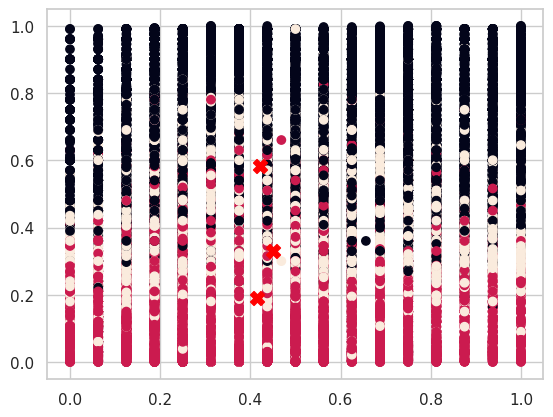

In [144]:
def viz_clusters(kmeans):
    plt.scatter(clusters['years_of_experience'], clusters['ctc'], c=clusters['label'])
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                color="red",
                marker="X",
                s=100)

viz_clusters(kmeans)

### No clarity in visualization usinf scatter plot
__Summary__:
- I have tried bunch of features to visualize but I am not able to get proper result and it's not clear.
- Using polar plot for better visialization:

In [145]:
# Using polar plot for better visialization:
polar = clusters.groupby("label").mean().reset_index()
polar = pd.melt(polar, id_vars=["label"])
polar

,label,variable,value
0,0,company_hash,0.421149
1,1,company_hash,0.414624
2,2,company_hash,0.450427
3,0,ctc,0.582043
4,1,ctc,0.189985
...,...,...,...
16,1,designation,0.865536
17,2,designation,0.454349
18,0,tier,0.059799
19,1,tier,0.979395


In [146]:
# pip install plotly

In [147]:
import plotly.express as px

fig = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=700,width=800)
fig.show()

### Feature definitions:
- 1. #### Designation: Salary an employee is getting wrt salary in the same Company, Job_Position & Years of Experience
- 2. #### Class: Salary an employee is getting wrt the salary in the same Company & Job_Position
- 3. #### Tier: Salary an employee is getting wrt the salary in the same Companydescent

## Super clarity in visualizing the clusters using polar line plots:
### Observations and Recommendations:
- We have three cluster mainly (label - 0, 1, 2)
- `job_position` , `years of experience`, `comapny_hash` for all the people in the three cluster is nearly same. So we can compare the other features keeping this useful info in mind.
- The students **whose salaries are already high (Label 2)**, and who comes from a descent job role in a descent company, having slightly more amount experience, hardly care about designation , class or tier as they all are **best of all** !!
    - (Recomm.) Scaler should completely **ignore these students for advertising/marketing their product**  as they don't need to upskill as they already are **super skilled.**
    - (Recomm.) Instead, Scaler team should identify and talk to these folks **if they are interested in teaching/mentoring**. This way, Scaler would be having **best of the best instructors/mentors** in the business.
- The students **who have median salary (not too high, not too low) (Label 0)**, and who comes from a descent job role in a descent company, having descent amount experience, requires little upscalling.
    - (Recomm.) Scaler should advertise these set of students with **some advanced courses** so that they can compete with top tier students.
- The students **who have least salary (Label 1)**, and who comes from a descent job role in a descent company, having descent amount experience, **requires lots of upscalling**. As these students belongs to **designation - 3, class- 3, tier- 3**
    - (Recomm.) These are the target audience. Scaler team **should heavily focus on advertising / marketing all their tech products/ couses, free master clases**, to these set of learners

In [148]:
!pip install pyclustertend==1.4.9

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from pyclustertend import hopkins
from sklearn.preprocessing import scale

In [150]:
data_new = data.copy()

In [151]:
# data_new.drop('label', axis = 1,inplace = True)

In [152]:
data_new.dropna(inplace=True)


In [153]:
data_new

,company_hash,ctc,job_position,years_of_experience,classs,designation,tier
0,45,0.330330,377,6.0,1,2,2
1,1497,0.135134,235,4.0,3,3,3
2,0,0.600600,105,7.0,1,1,1
3,936,0.210210,105,5.0,3,3,3
4,1535,0.420420,235,5.0,1,2,1
...,...,...,...,...,...,...,...
146047,884,0.675675,0,11.0,1,1,1
146048,2158,0.066066,0,14.0,3,2,3
146049,636,0.150150,0,5.0,3,3,3
146050,2186,0.210210,0,1.0,3,2,3


In [154]:
hop=hopkins(data_new,150)


In [155]:
hop

0.057361554817738185

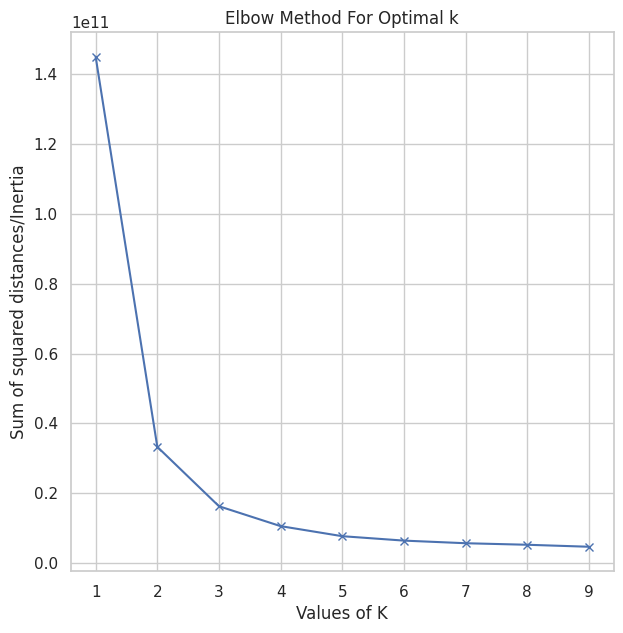

In [156]:
plt.figure(figsize = (7,7))
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data_new)
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Sum of squared distances/Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

#### From above plot, it's clear that we require 3 clusters and our earlier assumption is correct.

In [157]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data_new)
print(kmeans.cluster_centers_)
print(kmeans.cluster_centers_.shape)

[[2.20004364e+02 3.38710849e-01 1.89451912e+02 6.82628404e+00
  2.20934977e+00 2.16183802e+00 2.24353766e+00]
 [2.41601544e+03 3.28778754e-01 1.78887926e+02 6.30840606e+00
  2.19061878e+00 2.11384724e+00 2.24195741e+00]
 [1.25708218e+03 3.53266177e-01 1.75597005e+02 6.46729692e+00
  2.17258388e+00 2.08546987e+00 2.23449622e+00]]
(3, 7)


In [158]:
data_new['k-m label']=kmeans.fit_predict(data_new)


In [159]:
data_new

,company_hash,ctc,job_position,years_of_experience,classs,designation,tier,k-m label
0,45,0.330330,377,6.0,1,2,2,0
1,1497,0.135134,235,4.0,3,3,3,2
2,0,0.600600,105,7.0,1,1,1,0
3,936,0.210210,105,5.0,3,3,3,2
4,1535,0.420420,235,5.0,1,2,1,2
...,...,...,...,...,...,...,...,...
146047,884,0.675675,0,11.0,1,1,1,2
146048,2158,0.066066,0,14.0,3,2,3,1
146049,636,0.150150,0,5.0,3,3,3,0
146050,2186,0.210210,0,1.0,3,2,3,1


In [160]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146052 entries, 0 to 146051
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   company_hash         146052 non-null  int64  
 1   ctc                  146052 non-null  float64
 2   job_position         146052 non-null  int64  
 3   years_of_experience  146052 non-null  float64
 4   classs               146052 non-null  int64  
 5   designation          146052 non-null  int64  
 6   tier                 146052 non-null  int64  
 7   k-m label            146052 non-null  int32  
dtypes: float64(2), int32(1), int64(5)
memory usage: 8.4 MB


In [161]:
df_cjy_cj_c

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,classs,designation,count,mean,std,min,25%,50%,75%,max,tier
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,6.0,1,2,9.0,1.115667e+06,4.581119e+05,500000.0,800000.0,1070000.0,1500000.0,1771000.0,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,4.0,3,3,384.0,1.055291e+06,6.360957e+05,10000.0,600000.0,850000.0,1500000.0,3200000.0,3
2,Others,2015.0,2000000,backend engineer,2020.0,7.0,1,1,24489.0,9.675951e+05,7.616669e+05,15.0,390000.0,800000.0,1400000.0,3329999.0,1
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,5.0,3,3,59.0,1.455508e+06,6.554235e+05,200000.0,1075000.0,1300000.0,1850000.0,3160000.0,3
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,5.0,1,2,6.0,9.400000e+05,3.898718e+05,540000.0,625000.0,850000.0,1300000.0,1400000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146047,mvqwrvjo,2011.0,2250000,Others,2019.0,11.0,1,1,65.0,1.264431e+06,5.743451e+05,500000.0,800000.0,1040000.0,1600000.0,3200000.0,1
146048,vuurt xzw,2008.0,220000,Others,2019.0,14.0,3,2,16.0,1.568312e+06,1.231984e+06,60000.0,216250.0,2275000.0,2550000.0,3000000.0,3
146049,husqvawgb,2017.0,500000,Others,2020.0,5.0,3,3,97.0,1.275361e+06,5.880548e+05,200000.0,850000.0,1150000.0,1600000.0,3200000.0,3
146050,vwwgrxnt,2021.0,700000,Others,2021.0,1.0,3,2,157.0,1.344255e+06,5.743742e+05,200000.0,1000000.0,1300000.0,1500000.0,3000000.0,3


In [162]:
df_cjy_cj_c.drop(columns=['count','mean','std','min','25%','50%','75%','max'],inplace=True)


In [163]:
data_org = df_cjy_cj_c.copy()

In [164]:
final_data = pd.concat([data_org,data_new['k-m label']], axis=1)
final_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146052 entries, 0 to 146051
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   company_hash         146052 non-null  object 
 1   orgyear              146052 non-null  float64
 2   ctc                  146052 non-null  int64  
 3   job_position         146052 non-null  object 
 4   ctc_updated_year     146052 non-null  float64
 5   years_of_experience  146052 non-null  float64
 6   classs               146052 non-null  int64  
 7   designation          146052 non-null  int64  
 8   tier                 146052 non-null  int64  
 9   k-m label            146052 non-null  int32  
dtypes: float64(3), int32(1), int64(4), object(2)
memory usage: 10.6+ MB


In [165]:
final_data

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,classs,designation,tier,k-m label
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,6.0,1,2,2,0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,4.0,3,3,3,2
2,Others,2015.0,2000000,backend engineer,2020.0,7.0,1,1,1,0
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,5.0,3,3,3,2
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,5.0,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...
146047,mvqwrvjo,2011.0,2250000,Others,2019.0,11.0,1,1,1,2
146048,vuurt xzw,2008.0,220000,Others,2019.0,14.0,3,2,3,1
146049,husqvawgb,2017.0,500000,Others,2020.0,5.0,3,3,3,0
146050,vwwgrxnt,2021.0,700000,Others,2021.0,1.0,3,2,3,1


In [166]:
data_frac=data_new.sample(frac=0.0025)
#the most we could do without crashing

In [167]:
data_frac

,company_hash,ctc,job_position,years_of_experience,classs,designation,tier,k-m label
131463,1926,0.390390,0,6.0,3,3,3,1
5771,569,0.750751,0,4.0,1,1,1,0
86562,2309,0.162162,0,2.0,2,2,2,1
28327,2191,0.135135,679,5.0,2,2,3,1
142745,2918,0.630630,0,4.0,1,1,1,1
...,...,...,...,...,...,...,...,...
71366,2176,0.255255,686,9.0,3,3,3,1
78411,252,0.270270,230,5.0,2,1,2,0
64197,519,0.450450,235,7.0,3,3,3,0
17649,2191,0.270270,0,3.0,2,1,2,1


In [168]:
data_frac.drop('k-m label', axis = 1, inplace = True)

In [169]:
data_frac.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 131463 to 132246
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company_hash         365 non-null    int64  
 1   ctc                  365 non-null    float64
 2   job_position         365 non-null    int64  
 3   years_of_experience  365 non-null    float64
 4   classs               365 non-null    int64  
 5   designation          365 non-null    int64  
 6   tier                 365 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 22.8 KB


In [170]:
import sys
sys.setrecursionlimit(100000)


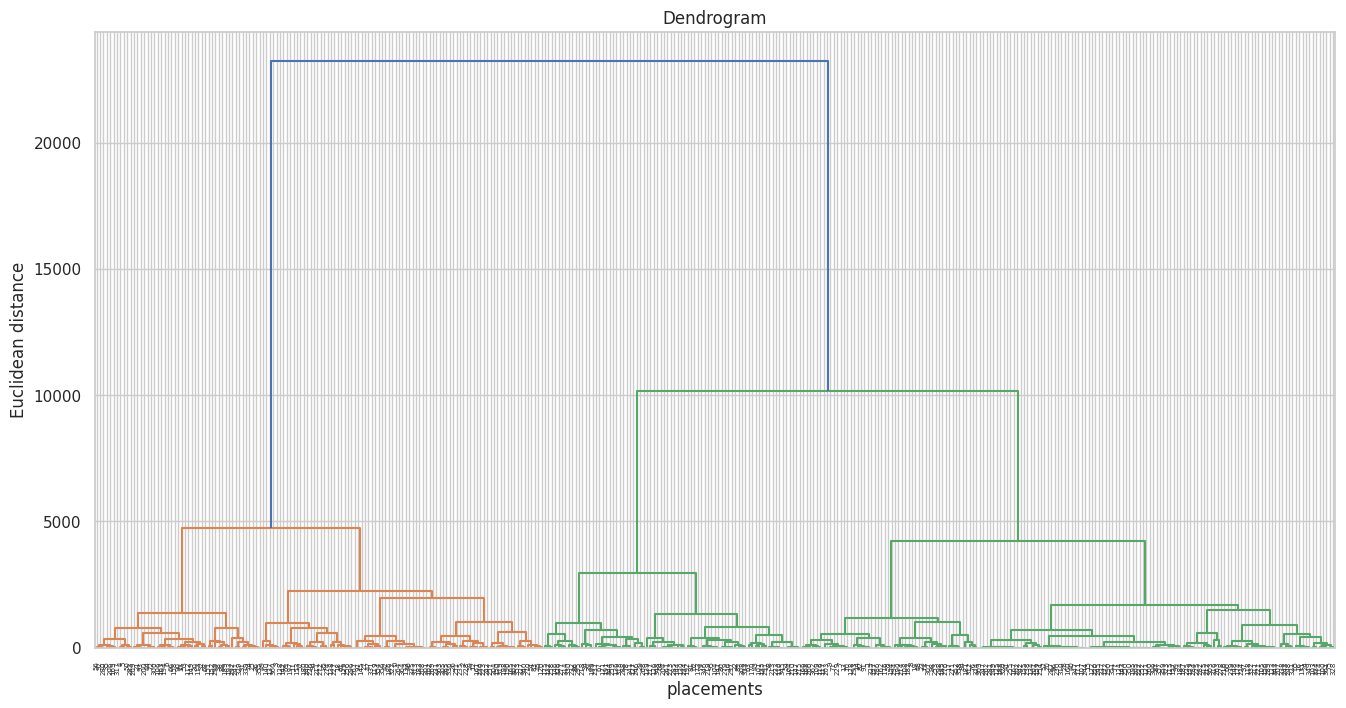

In [171]:
# Visual representation of clusters using dendrogram

plt.figure(figsize = (16,8))
import scipy.cluster.hierarchy as sch
dendrogrm = sch.dendrogram(sch.linkage(data_frac, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('placements')
plt.ylabel('Euclidean distance')
plt.show()

In [172]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model.fit(data_frac)


AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [173]:
data_frac['Aglo-label'] = model.fit_predict(data_frac)


In [174]:
data_frac

,company_hash,ctc,job_position,years_of_experience,classs,designation,tier,Aglo-label
131463,1926,0.390390,0,6.0,3,3,3,0
5771,569,0.750751,0,4.0,1,1,1,1
86562,2309,0.162162,0,2.0,2,2,2,0
28327,2191,0.135135,679,5.0,2,2,3,0
142745,2918,0.630630,0,4.0,1,1,1,0
...,...,...,...,...,...,...,...,...
71366,2176,0.255255,686,9.0,3,3,3,0
78411,252,0.270270,230,5.0,2,1,2,1
64197,519,0.450450,235,7.0,3,3,3,1
17649,2191,0.270270,0,3.0,2,1,2,0


In [175]:
final_data

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,classs,designation,tier,k-m label
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,6.0,1,2,2,0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,4.0,3,3,3,2
2,Others,2015.0,2000000,backend engineer,2020.0,7.0,1,1,1,0
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,5.0,3,3,3,2
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,5.0,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...
146047,mvqwrvjo,2011.0,2250000,Others,2019.0,11.0,1,1,1,2
146048,vuurt xzw,2008.0,220000,Others,2019.0,14.0,3,2,3,1
146049,husqvawgb,2017.0,500000,Others,2020.0,5.0,3,3,3,0
146050,vwwgrxnt,2021.0,700000,Others,2021.0,1.0,3,2,3,1


### To conclude, above is the final_data with all required features.
-  We can submit this data to marketing team so that they can focus on those clusters of students who are in dire need and are willing to move forward in life.